# Ridge Regression and Lasso

This notebook explores ridge regression and lasso. These alternative linear fitting techniques can improve a model's performance and interpretability.

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Exploratory Data Analysis 

In [2]:
data = pd.read_csv('./Advertising.csv', index_col=0)
data = data.reset_index()

In [3]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        data[feature],
        data[target],
        c='black'
    )
    plt.xlabel("Money spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

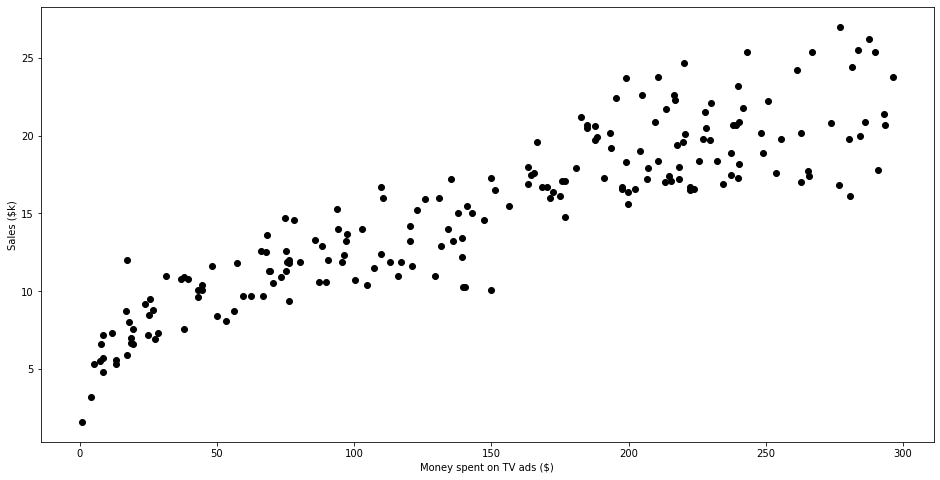

In [5]:
scatter_plot('TV', 'Sales')

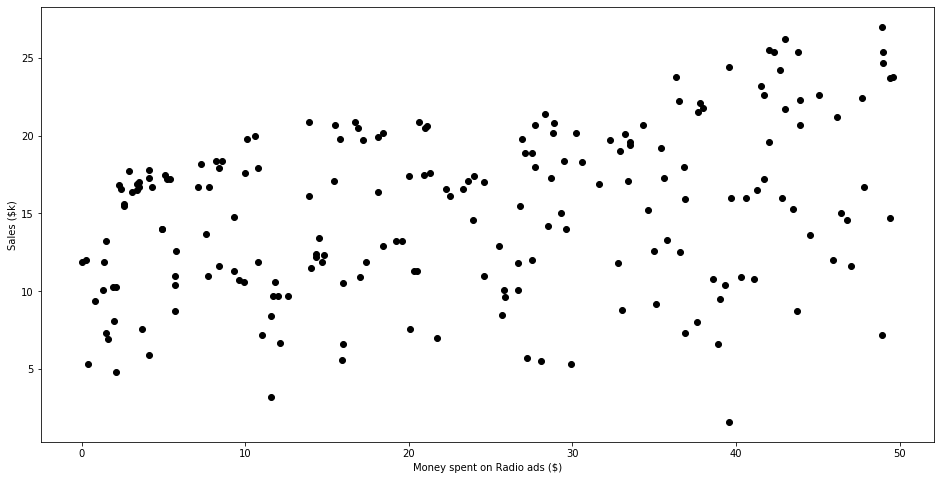

In [6]:
scatter_plot('Radio', 'Sales')

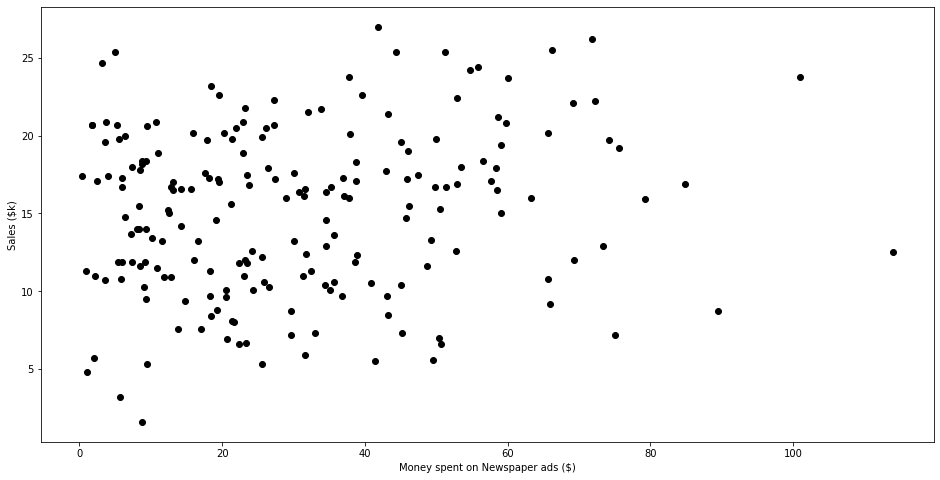

In [7]:
scatter_plot('Newspaper', 'Sales')

## Modelling 

### Multiple linear regression - least squares fitting 

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Xs = data.drop(['Sales'], axis=1)
y = data['Sales'].values.reshape(-1,1)

lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, Xs, y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

print(mean_MSE)

-2.8582430099910097


### Ridge regression 

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': alpha}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(Xs, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [10]:
ridge_regressor.best_params_

{'alpha': 20}

In [11]:
ridge_regressor.best_score_

-2.8581838191918476

### Lasso 

In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': alpha}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(Xs, y)

C:\Users\aleks\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203.73429765446758, tolerance: 0.45734577499999995
  positive)
C:\Users\aleks\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.675837314468, tolerance: 0.4367106937500001
  positive)
C:\Users\aleks\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130.03378321357542, tolerance: 0.458666
  positive)
C:\Users\aleks\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [13]:
lasso_regressor.best_params_

{'alpha': 1}

In [14]:
lasso_regressor.best_score_

-2.851375129372136